# Assignment 1
by:
- Christoffer Wikner (931012)
- Erik Rosvall (960523)


In [1]:
import pandas as pd
import matplotlib as plt
from sklearn.linear_model import LinearRegression

## 1
### A)

In [2]:
df_gdpp = pd.read_csv('gdp_per_capita.csv')
df_life = pd.read_csv('le.csv')

In [3]:
df_gdpp.head()

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810063
2,Afghanistan,AFG,2004,1200.278013
3,Afghanistan,AFG,2005,1286.793659
4,Afghanistan,AFG,2006,1315.789117


In [4]:
df_life.head()

,Entity,Code,Year,Life expectancy
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878
2,Afghanistan,AFG,1952,28.361
3,Afghanistan,AFG,1953,28.852
4,Afghanistan,AFG,1954,29.350


Merge and dropping

In [5]:
# Merging the data sets, with 'Entity', 'Year', 'Code'
data_f = pd.merge(df_gdpp, df_life, on = ['Entity', 'Year', 'Code'],)

# Dropping this column because we don't see it relevant 
data_f.drop(columns=['Code'])

,Entity,Year,"GDP per capita, PPP (constant 2017 international $)",Life expectancy
0,Afghanistan,2002,1189.784668,56.784
1,Afghanistan,2003,1235.810063,57.271
2,Afghanistan,2004,1200.278013,57.772
3,Afghanistan,2005,1286.793659,58.290
4,Afghanistan,2006,1315.789117,58.826
...,...,...,...,...
5525,Zimbabwe,2015,3198.982129,59.534
5526,Zimbabwe,2016,3173.610829,60.294
5527,Zimbabwe,2017,3274.611198,60.812
5528,Zimbabwe,2018,3341.665418,61.195


We decided to remove entities that were not countries but rather amalgamations of several different countries such as the European Union. We initially thought of dropping all countries which had not to code since that was the case for most however exceptions such as the world with the code OWID_WRL made this a non-valid strategy and thus did manual data removing by finding the non-countries in the data-set.

Africa Eastern and Southern

Africa Western and Central

Arab World

Central Europe and the Baltics

Early-demographic dividend

East Asia & Pacific

East Asia & Pacific (excluding high income)

East Asia & Pacific (IDA & IBRD)

Europe & Central Asia (excluding high income)

Europe & Central Asia (IDA & IBRD)

European Union

Heavily indebted poor countries (HIPC)

High income

IBRD only

IDA & IBRD total

IDA blend

IDA only

IDA total

Late-demographic dividend

Latin America & Caribbean

Latin America & Caribbean (excluding high income)

Least developed countries: UN classification

Low & middle income

Lower middle income

Middle East & North Africa

Middle East & North Africa (excluding high income)

Middle East & North Africa (IDA & IBRD)

Middle income

North America

OECD members

Other small states

Pacific island small states

Post-demographic dividend

Pre-demographic dividend

Small states

South Asia

South Asia (IDA & IBRD)

Sub-Saharan Africa

Sub-Saharan Africa (excluding high income)

Sub-Saharan Africa (IDA & IBRD)

Upper middle income

World

#### Sorting 

In [6]:
# Since our data set is from 1990 and forward, we feelt not need to sort out years that could be 
# percieved as irrelavant such as datasets that might include the 50s etc

# This is not the best way to do it, but due to time constraints we were forced to 
# have more of a "brute force method"
data_f=data_f[data_f['Entity']!='World']
data_f=data_f[data_f['Entity']!='Upper middle income']
data_f=data_f[data_f['Entity']!='Sub-Saharan Africa (IDA & IBRD)']
data_f=data_f[data_f['Entity']!='Sub-Saharan Africa (excluding high income)']
data_f=data_f[data_f['Entity']!='Sub-Saharan Africa']
data_f=data_f[data_f['Entity']!='South Asia (IDA & IBRD)']
data_f=data_f[data_f['Entity']!='South Asia']
data_f=data_f[data_f['Entity']!='Small states']
data_f=data_f[data_f['Entity']!='Pre-demographic dividend']
data_f=data_f[data_f['Entity']!='Post-demographic dividend']
data_f=data_f[data_f['Entity']!='Pacific island small states']
data_f=data_f[data_f['Entity']!='Other small states']
data_f=data_f[data_f['Entity']!='OECD members']
data_f=data_f[data_f['Entity']!='North America']
data_f=data_f[data_f['Entity']!='Middle income']
data_f=data_f[data_f['Entity']!='Middle East & North Africa (IDA & IBRD)']
data_f=data_f[data_f['Entity']!='Middle East & North Africa (excluding high income)']
data_f=data_f[data_f['Entity']!='Middle East & North Africa']
data_f=data_f[data_f['Entity']!='Lower middle income']
data_f=data_f[data_f['Entity']!='Low & middle income']
data_f=data_f[data_f['Entity']!='Least developed countries: UN classification']
data_f=data_f[data_f['Entity']!='Latin America & Caribbean (excluding high income)']
data_f=data_f[data_f['Entity']!='Latin America & Caribbean']
data_f=data_f[data_f['Entity']!='Late-demographic dividend']
data_f=data_f[data_f['Entity']!='IDA total']
data_f=data_f[data_f['Entity']!='IDA only']
data_f=data_f[data_f['Entity']!='IDA blend']
data_f=data_f[data_f['Entity']!='IDA & IBRD total']
data_f=data_f[data_f['Entity']!='IBRD only']
data_f=data_f[data_f['Entity']!='High income']
data_f=data_f[data_f['Entity']!='Heavily indebted poor countries (HIPC)']
data_f=data_f[data_f['Entity']!='European Union']
data_f=data_f[data_f['Entity']!='Europe & Central Asia (IDA & IBRD)']
data_f=data_f[data_f['Entity']!='Europe & Central Asia (excluding high income)']
data_f=data_f[data_f['Entity']!='East Asia & Pacific (IDA & IBRD)']
data_f=data_f[data_f['Entity']!='East Asia & Pacific (excluding high income)']
data_f=data_f[data_f['Entity']!='East Asia & Pacific']
data_f=data_f[data_f['Entity']!='Early-demographic dividend']
data_f=data_f[data_f['Entity']!='Central Europe and the Baltics']
data_f=data_f[data_f['Entity']!='Arab World']
data_f=data_f[data_f['Entity']!='Africa Western and Central']
data_f=data_f[data_f['Entity']!='Africa Eastern and Southern']
data_f=data_f[data_f['Entity']!='World']

data_f

#df = data_f.drop('Upper middle income')

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)",Life expectancy
0,Afghanistan,AFG,2002,1189.784668,56.784
1,Afghanistan,AFG,2003,1235.810063,57.271
2,Afghanistan,AFG,2004,1200.278013,57.772
3,Afghanistan,AFG,2005,1286.793659,58.290
4,Afghanistan,AFG,2006,1315.789117,58.826
...,...,...,...,...,...
5525,Zimbabwe,ZWE,2015,3198.982129,59.534
5526,Zimbabwe,ZWE,2016,3173.610829,60.294
5527,Zimbabwe,ZWE,2017,3274.611198,60.812
5528,Zimbabwe,ZWE,2018,3341.665418,61.195


Checking code to make sure its removed

In [7]:
data_f[data_f["Entity"] == "World"]

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)",Life expectancy


Checking that the rows we want are still there

In [8]:
data_f[data_f["Entity"] == "Afghanistan"]

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)",Life expectancy
0,Afghanistan,AFG,2002,1189.784668,56.784
1,Afghanistan,AFG,2003,1235.810063,57.271
2,Afghanistan,AFG,2004,1200.278013,57.772
3,Afghanistan,AFG,2005,1286.793659,58.290
4,Afghanistan,AFG,2006,1315.789117,58.826
5,Afghanistan,AFG,2007,1460.825751,59.375
6,Afghanistan,AFG,2008,1484.114461,59.930
7,Afghanistan,AFG,2009,1758.904477,60.484
8,Afghanistan,AFG,2010,1957.029070,61.028
9,Afghanistan,AFG,2011,1904.559926,61.553


In [9]:
data_f.Entity.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       

In [10]:
data_f.Year.unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001], dtype=int64)

<AxesSubplot:xlabel='Life expectancy', ylabel='GDP per capita, PPP (constant 2017 international $)'>

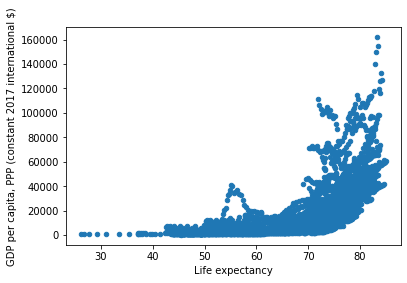

In [11]:
data_f.plot.scatter('Life expectancy','GDP per capita, PPP (constant 2017 international $)')

### B

### C

Data cleaning:
We did some data cleaning. We removed rows where the data included more then one specific country.

### D

In [12]:
data_f["Life expectancy"].std()

9.639146337043176

In [13]:
data_f["Life expectancy"].mean()

68.74444781818181

In [14]:
df_e = data_f.set_index('Entity')
df_e

,Code,Year,"GDP per capita, PPP (constant 2017 international $)",Life expectancy
Entity,,,,
Afghanistan,AFG,2002,1189.784668,56.784
Afghanistan,AFG,2003,1235.810063,57.271
Afghanistan,AFG,2004,1200.278013,57.772
Afghanistan,AFG,2005,1286.793659,58.290
Afghanistan,AFG,2006,1315.789117,58.826
...,...,...,...,...
Zimbabwe,ZWE,2015,3198.982129,59.534
Zimbabwe,ZWE,2016,3173.610829,60.294
Zimbabwe,ZWE,2017,3274.611198,60.812


Here we get the sum of the standard deviation and the mean of life exceptancy. We add these together to get a value of x and then we sort in data for values >= x then we find the unique members as countries will otherwise reappear in results multiple times because they are >= the value of x several years. 

In [15]:
x = data_f["Life expectancy"].std() + data_f["Life expectancy"].mean()
x

78.38359415522498

In [16]:
data_l = data_f[data_f['Life expectancy']>= x]

In [17]:
data_l.Entity.unique()

array(['Albania', 'Australia', 'Austria', 'Barbados', 'Belgium',
       'Bermuda', 'Canada', 'Cayman Islands', 'Chile', 'Costa Rica',
       'Croatia', 'Curacao', 'Cyprus', 'Czechia', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Luxembourg',
       'Macao', 'Maldives', 'Malta', 'Netherlands', 'New Zealand',
       'Norway', 'Panama', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'San Marino', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland',
       'Turks and Caicos Islands', 'United Kingdom', 'United States'],
      dtype=object)

### E

In [18]:
b = data_f["Life expectancy"].mean()
b

68.74444781818181

In [19]:
s = data_f["Life expectancy"].std()
s

9.639146337043176

In [20]:
zz = b + s
zz
# The mean of life expectancy + 1 standard deviations is what we consider a high life exceptancy

78.38359415522498

In [21]:
y = data_f['GDP per capita, PPP (constant 2017 international $)'].mean()
y

17890.146722229907

In [22]:
z =  y * 0.85
z
# The mean of GDP Per Capita * 0.85 is what we consider a weak economy.

15206.62471389542

In [23]:
sorted_df = data_f[data_f['Life expectancy']>= zz] 
sorted_df.head()

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)",Life expectancy
46,Albania,ALB,2018,13323.753356,78.458
47,Albania,ALB,2019,13671.488422,78.573
232,Australia,AUS,1996,33778.063539,78.508
233,Australia,AUS,1997,34727.199783,78.759
234,Australia,AUS,1998,35940.017136,79.024


In [24]:
sorted_df = sorted_df[sorted_df['GDP per capita, PPP (constant 2017 international $)']<= z]

In [25]:
sorted_df.head()

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)",Life expectancy
46,Albania,ALB,2018,13323.753356,78.458
47,Albania,ALB,2019,13671.488422,78.573
429,Barbados,BRB,2013,15088.441351,78.633
430,Barbados,BRB,2014,15041.554748,78.717
2771,Lebanon,LBN,2019,14551.593712,78.930


In [26]:
sorted_df.Entity.unique()

array(['Albania', 'Barbados', 'Lebanon'], dtype=object)

### F

In [27]:
df_gdp_only = pd.read_csv('gdp-world-regions-stacked-area.csv')

In [28]:
df_gdp_only.head()

,Entity,Code,Year,GDP,146201-annotations
0,Afghanistan,AFG,1950,9.421400e+09,NaN
1,Afghanistan,AFG,1951,9.692280e+09,NaN
2,Afghanistan,AFG,1952,1.001732e+10,NaN
3,Afghanistan,AFG,1953,1.063052e+10,NaN
4,Afghanistan,AFG,1954,1.086636e+10,NaN


In [29]:
df_merge = pd.merge(df_gdp_only, df_life, on = ['Entity', 'Year', 'Code'],)

In [30]:
df_merge=df_merge.drop(columns=['146201-annotations'])

We decided to remove entities that were not countries but rather amalgamations of several different countries such as the European Union. We initially thought of dropping all countries which had not to code since that was the case for most however exceptions such as the world with the code OWID_WRL made this a non-valid strategy and thus did manual data removing by finding the non-countries in the data-set.


- East Asia
- Eastern Europe
- Former USSR
- Former Yugoslavia
- Latin America
- Middle East
- South and South-East Asia
- Sub-Sahara Africa
- Western Europe
- Western Offshoots
- World

In [31]:
df_merge = df_merge[df_merge['Entity']!='World']
df_merge = df_merge[df_merge['Entity']!='Western Offshoots']
df_merge = df_merge[df_merge['Entity']!='Western Europe']
df_merge = df_merge[df_merge['Entity']!='Sub-Sahara Africa']
df_merge = df_merge[df_merge['Entity']!='South and South-East Asia']
df_merge = df_merge[df_merge['Entity']!='Middle East']
df_merge = df_merge[df_merge['Entity']!='Latin America']
df_merge = df_merge[df_merge['Entity']!='Former Yugoslavia']
df_merge = df_merge[df_merge['Entity']!='Former USSR']
df_merge = df_merge[df_merge['Entity']!='Eastern Europe']
df_merge = df_merge[df_merge['Entity']!='East Asia']

Checking the filtering

In [32]:
df_merge[df_merge['Entity']=='World']

,Entity,Code,Year,GDP,Life expectancy


Checking the filtering

In [33]:
df_merge[df_merge['Entity']=='Albania']

,Entity,Code,Year,GDP,Life expectancy
69,Albania,ALB,1950,1.958541e+09,54.191
70,Albania,ALB,1951,2.089362e+09,54.399
71,Albania,ALB,1952,2.138256e+09,54.875
72,Albania,ALB,1953,2.282159e+09,55.468
73,Albania,ALB,1954,2.415073e+09,56.180
...,...,...,...,...,...
133,Albania,ALB,2014,2.967564e+10,77.813
134,Albania,ALB,2015,3.044453e+10,78.025
135,Albania,ALB,2016,3.148182e+10,78.194
136,Albania,ALB,2017,3.267876e+10,78.333


Plotting

<AxesSubplot:xlabel='GDP', ylabel='Life expectancy'>

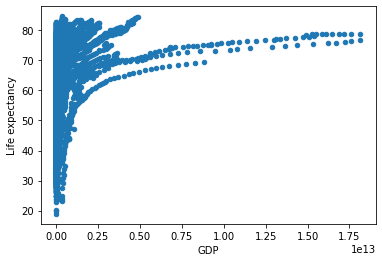

In [34]:
df_merge.plot.scatter('GDP','Life expectancy')

In [35]:
o = df_merge['GDP'].mean()
o

256975907393.24448

In [36]:
oo = df_merge['GDP'].std()
oo

1013933233004.3193

In [37]:
op = o + oo
op

1270909140397.5637

We define a high GDP as the mean + standard_deviation

Based on what we consider a strong economy with the mean + std every country which has a GDP of >= the threshold do not have a high life expectancy based on the previous metric of high being >= 78.38359415522498. So to answer whether every country with a high GDP has a high life expectancy the answer is no. 

### G

<AxesSubplot:xlabel='GDP per capita, PPP (constant 2017 international $)', ylabel='Life expectancy'>

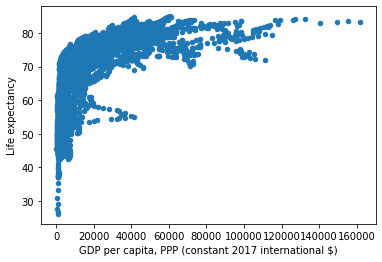

In [38]:
data_f.plot.scatter('GDP per capita, PPP (constant 2017 international $)', 'Life expectancy')

In [39]:
u = data_f['GDP per capita, PPP (constant 2017 international $)'].mean()
u

17890.146722229907

In [40]:
uu = data_f['GDP per capita, PPP (constant 2017 international $)'].std()
uu

20381.59218542165

In [41]:
uz = u + uu + uu
uz

58653.331093073204

We define a high GDP per capita as the mean + 2*standard_deviateions

As with GDP, GDP per capita seems highly correlated to life expectancy but to answer the question whether every country with a strong economy (GDP per capita mean + 2 standard deviations) has a high life expectancy the answer is no. As the graph illustrates that the intersection of the y and x axis at 58653.33109 and life exp is about 72, 73 years which is lower than the previously stated standard of >= 78.38359415522498.

## 2
### A

*We have cleaed all the contry data sets when merged with life ex. this made is sure not to include years from life ex. that don't have a match.* 

In [42]:
df_edu = pd.read_csv('government-expenditure-education.csv')

In [43]:
data_eg = pd.merge(df_gdpp, df_edu, on = ['Entity', 'Year', 'Code'],)

Africa Eastern and Southern

Africa Western and Central

Arab World

Caribbean Small States

Central Europe and the Baltics

Early-demographic dividend

East Asia & Pacific

East Asia & Pacific (IDA & IBRD)

East Asia & Pacific (excluding high income)

Euro area

Europe & Central Asia

Europe & Central Asia (IDA & IBRD)

Europe & Central Asia (excluding high income)

European Union

Fragile and conflict affected situations

Heavily indebted poor countries (HIPC)

High income

IBRD only

IDA & IBRD total

IDA blend

IDA only

IDA total

Late-demographic dividend

Latin America & Caribbean

Latin America & Caribbean (IDA & IBRD)

Latin America & Caribbean (excluding high income)

Least developed countries: UN classification

Low & middle income

Low income

Lower middle income

Middle East & North Africa

Middle East & North Africa (IDA & IBRD)

Middle East & North Africa (excluding high income)

Middle income

North America

OECD members

Other small states

Post-demographic dividend

Pre-demographic dividend

Small states

South Asia

South Asia (IDA & IBRD)

Sub-Saharan Africa

Sub-Saharan Africa (IDA & IBRD)

Sub-Saharan Africa (excluding high income)

Upper middle income

In [44]:
data_eg = data_eg[data_eg['Entity']!='World']
data_eg = data_eg[data_eg['Entity']!='Upper middle income']
data_eg = data_eg[data_eg['Entity']!='Sub-Saharan Africa (excluding high income)']
data_eg = data_eg[data_eg['Entity']!='Sub-Saharan Africa (IDA & IBRD)']
data_eg = data_eg[data_eg['Entity']!='Sub-Saharan Africa']
data_eg = data_eg[data_eg['Entity']!='South Asia (IDA & IBRD)']
data_eg = data_eg[data_eg['Entity']!='South Asia']
data_eg = data_eg[data_eg['Entity']!='Small states']
data_eg = data_eg[data_eg['Entity']!='Pre-demographic dividend']
data_eg = data_eg[data_eg['Entity']!='Post-demographic dividend']
data_eg = data_eg[data_eg['Entity']!='Other small states']
data_eg = data_eg[data_eg['Entity']!='OECD members']
data_eg = data_eg[data_eg['Entity']!='North America']
data_eg = data_eg[data_eg['Entity']!='Middle income']
data_eg = data_eg[data_eg['Entity']!='Middle East & North Africa (excluding high income)']
data_eg = data_eg[data_eg['Entity']!='Middle East & North Africa (IDA & IBRD)']
data_eg = data_eg[data_eg['Entity']!='Middle East & North Africa']
data_eg = data_eg[data_eg['Entity']!='Lower middle income']
data_eg = data_eg[data_eg['Entity']!='Low income']
data_eg = data_eg[data_eg['Entity']!='Low & middle income']
data_eg = data_eg[data_eg['Entity']!='Least developed countries: UN classification']
data_eg = data_eg[data_eg['Entity']!='Latin America & Caribbean (excluding high income)']
data_eg = data_eg[data_eg['Entity']!='Latin America & Caribbean (IDA & IBRD)']
data_eg = data_eg[data_eg['Entity']!='Latin America & Caribbean']
data_eg = data_eg[data_eg['Entity']!='Late-demographic dividend']
data_eg = data_eg[data_eg['Entity']!='IDA total']
data_eg = data_eg[data_eg['Entity']!='IDA only']
data_eg = data_eg[data_eg['Entity']!='IDA blend']
data_eg = data_eg[data_eg['Entity']!='IDA & IBRD total']
data_eg = data_eg[data_eg['Entity']!='IBRD only']
data_eg = data_eg[data_eg['Entity']!='High income']
data_eg = data_eg[data_eg['Entity']!='Heavily indebted poor countries (HIPC)']
data_eg = data_eg[data_eg['Entity']!='Fragile and conflict affected situations']
data_eg = data_eg[data_eg['Entity']!='European Union']
data_eg = data_eg[data_eg['Entity']!='Europe & Central Asia (excluding high income)']
data_eg = data_eg[data_eg['Entity']!='Europe & Central Asia (IDA & IBRD)']
data_eg = data_eg[data_eg['Entity']!='WorEurope & Central Asiald']
data_eg = data_eg[data_eg['Entity']!='Euro area']
data_eg = data_eg[data_eg['Entity']!='East Asia & Pacific (excluding high income)']
data_eg = data_eg[data_eg['Entity']!='East Asia & Pacific (IDA & IBRD)']
data_eg = data_eg[data_eg['Entity']!='East Asia & Pacific']
data_eg = data_eg[data_eg['Entity']!='Early-demographic dividend']
data_eg = data_eg[data_eg['Entity']!='Central Europe and the Baltics']
data_eg = data_eg[data_eg['Entity']!='Caribbean Small States']
data_eg = data_eg[data_eg['Entity']!='Arab World']
data_eg = data_eg[data_eg['Entity']!='Africa Western and Central']
data_eg = data_eg[data_eg['Entity']!='Africa Eastern and Southern']

In [45]:
data_eg.head()

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)","Government expenditure on education, total (% of government expenditure)"
0,Afghanistan,AFG,2010,1957.029070,17.067560
1,Afghanistan,AFG,2011,1904.559926,16.048429
2,Afghanistan,AFG,2012,2075.491614,10.356800
3,Afghanistan,AFG,2013,2116.465258,14.102800
4,Afghanistan,AFG,2014,2102.384604,14.465930


In [46]:
data_eg=data_eg.drop(columns=['Code'])

In [47]:
data_eg.head()

,Entity,Year,"GDP per capita, PPP (constant 2017 international $)","Government expenditure on education, total (% of government expenditure)"
0,Afghanistan,2010,1957.029070,17.067560
1,Afghanistan,2011,1904.559926,16.048429
2,Afghanistan,2012,2075.491614,10.356800
3,Afghanistan,2013,2116.465258,14.102800
4,Afghanistan,2014,2102.384604,14.465930


Text(0.5, 0, 'Government expenditure on education')

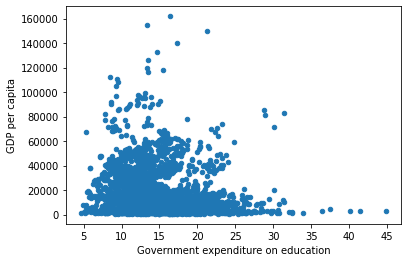

In [48]:
ax = data_eg.plot.scatter('Government expenditure on education, total (% of government expenditure)', 'GDP per capita, PPP (constant 2017 international $)')
ax.set_ylabel("GDP per capita")
ax.set_xlabel("Government expenditure on education")

In [49]:
df_hom = pd.read_csv('intentional-homicides-per-100000-people.csv')

In [50]:
data_hg = pd.merge(df_gdpp, df_hom, on = ['Entity', 'Year', 'Code'],)

Africa Eastern and Southern

Africa Western and Central

Arab World

Caribbean Small States

Central Europe and the Baltics

Early-demographic dividend

East Asia & Pacific

East Asia & Pacific (IDA & IBRD)

East Asia & Pacific (excluding high income)

Euro area

Europe & Central Asia

Europe & Central Asia (IDA & IBRD)

Europe & Central Asia (excluding high income)

European Union

Fragile and conflict affected situations

Heavily indebted poor countries (HIPC)

High income

IBRD only

IDA & IBRD total

IDA blend

IDA only

IDA total

Late-demographic dividend

Latin America & Caribbean

Latin America & Caribbean (IDA & IBRD)

Latin America & Caribbean (excluding high income)

Least developed countries: UN classification

Low & middle income

Low income

Lower middle income

Middle East & North Africa

Middle East & North Africa (IDA & IBRD)

Middle East & North Africa (excluding high income)

Middle income

North America

OECD members

Other small states

Pacific island small states

Post-demographic dividend

Pre-demographic dividend

Small states

South Asia

South Asia (IDA & IBRD)

Sub-Saharan Africa

Sub-Saharan Africa (IDA & IBRD)

Sub-Saharan Africa (excluding high income)

Upper middle income

In [51]:
data_hg = data_hg[data_hg['Entity']!='World']
data_hg = data_hg[data_hg['Entity']!='Africa Eastern and Southern']
data_hg = data_hg[data_hg['Entity']!='Africa Western and Central']
data_hg = data_hg[data_hg['Entity']!='Arab World']
data_hg = data_hg[data_hg['Entity']!='Caribbean Small States']
data_hg = data_hg[data_hg['Entity']!='Central Europe and the Baltics']
data_hg = data_hg[data_hg['Entity']!='Early-demographic dividend']
data_hg = data_hg[data_hg['Entity']!='East Asia & Pacific']
data_hg = data_hg[data_hg['Entity']!='East Asia & Pacific (IDA & IBRD)']
data_hg = data_hg[data_hg['Entity']!='East Asia & Pacific (excluding high income)']
data_hg = data_hg[data_hg['Entity']!='Euro area']
data_hg = data_hg[data_hg['Entity']!='Europe & Central Asia']
data_hg = data_hg[data_hg['Entity']!='Europe & Central Asia (IDA & IBRD)']
data_hg = data_hg[data_hg['Entity']!='Europe & Central Asia (excluding high income)']
data_hg = data_hg[data_hg['Entity']!='European Union']
data_hg = data_hg[data_hg['Entity']!='Fragile and conflict affected situations']
data_hg = data_hg[data_hg['Entity']!='Heavily indebted poor countries (HIPC)']
data_hg = data_hg[data_hg['Entity']!='High income']
data_hg = data_hg[data_hg['Entity']!='IBRD only']
data_hg = data_hg[data_hg['Entity']!='IDA & IBRD total']
data_hg = data_hg[data_hg['Entity']!='IDA blend']
data_hg = data_hg[data_hg['Entity']!='IDA only']
data_hg = data_hg[data_hg['Entity']!='IDA total']
data_hg = data_hg[data_hg['Entity']!='Late-demographic dividend']
data_hg = data_hg[data_hg['Entity']!='Latin America & Caribbean']
data_hg = data_hg[data_hg['Entity']!='Latin America & Caribbean (IDA & IBRD)']
data_hg = data_hg[data_hg['Entity']!='Latin America & Caribbean (excluding high income)']
data_hg = data_hg[data_hg['Entity']!='Least developed countries: UN classification']
data_hg = data_hg[data_hg['Entity']!='Low & middle income']
data_hg = data_hg[data_hg['Entity']!='Low income']
data_hg = data_hg[data_hg['Entity']!='Lower middle income']
data_hg = data_hg[data_hg['Entity']!='Middle East & North Africa']
data_hg = data_hg[data_hg['Entity']!='Middle East & North Africa (IDA & IBRD)']
data_hg = data_hg[data_hg['Entity']!='Middle East & North Africa (excluding high income)']
data_hg = data_hg[data_hg['Entity']!='Middle income']
data_hg = data_hg[data_hg['Entity']!='North America']
data_hg = data_hg[data_hg['Entity']!='OECD members']
data_hg = data_hg[data_hg['Entity']!='Other small states']
data_hg = data_hg[data_hg['Entity']!='Pacific island small states']
data_hg = data_hg[data_hg['Entity']!='Post-demographic dividend']
data_hg = data_hg[data_hg['Entity']!='Pre-demographic dividend']
data_hg = data_hg[data_hg['Entity']!='Small states']
data_hg = data_hg[data_hg['Entity']!='South Asia']
data_hg = data_hg[data_hg['Entity']!='South Asia (IDA & IBRD)']
data_hg = data_hg[data_hg['Entity']!='Sub-Saharan Africa']
data_hg = data_hg[data_hg['Entity']!='Sub-Saharan Africa (IDA & IBRD)']
data_hg = data_hg[data_hg['Entity']!='Sub-Saharan Africa (excluding high income)']
data_hg = data_hg[data_hg['Entity']!='Upper middle income']

In [52]:
data_hg=data_hg.drop(columns=['Code'])

In [53]:
data_hg.head()

,Entity,Year,"GDP per capita, PPP (constant 2017 international $)","Intentional homicides (per 100,000 people)"
0,Afghanistan,2009,1758.904477,3.926774
1,Afghanistan,2010,1957.029070,3.368110
2,Afghanistan,2011,1904.559926,4.087337
3,Afghanistan,2012,2075.491614,6.251328
4,Afghanistan,2015,2068.265904,9.783922


Text(0.5, 0, 'Intentional homicides (per 100,000 people)')

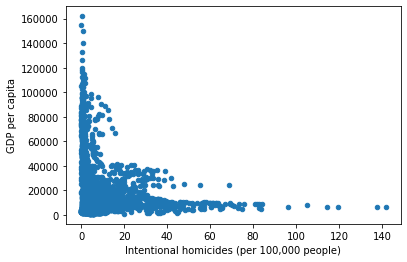

In [54]:
ay = data_hg.plot.scatter('Intentional homicides (per 100,000 people)', 'GDP per capita, PPP (constant 2017 international $)')
ay.set_ylabel("GDP per capita")
ay.set_xlabel("Intentional homicides (per 100,000 people)")

In [55]:
df_edu.drop(columns=['Code'])
df_hom.drop(columns=['Code'])
data_gh = pd.merge(df_edu, df_hom, on = ['Entity', 'Year'],)

In [56]:
data_gh = data_gh[data_gh['Entity']!='World']
data_gh = data_gh[data_gh['Entity']!='Africa Eastern and Southern']
data_gh = data_gh[data_gh['Entity']!='Africa Western and Central']
data_gh = data_gh[data_gh['Entity']!='Arab World']
data_gh = data_gh[data_gh['Entity']!='Caribbean Small States']
data_gh = data_gh[data_gh['Entity']!='Central Europe and the Baltics']
data_gh = data_gh[data_gh['Entity']!='Early-demographic dividend']
data_gh = data_gh[data_gh['Entity']!='East Asia & Pacific']
data_gh = data_gh[data_gh['Entity']!='East Asia & Pacific (IDA & IBRD)']
data_gh = data_gh[data_gh['Entity']!='East Asia & Pacific (excluding high income)']
data_gh = data_gh[data_gh['Entity']!='Euro area']
data_gh = data_gh[data_gh['Entity']!='Europe & Central Asia']
data_gh = data_gh[data_gh['Entity']!='Europe & Central Asia (IDA & IBRD)']
data_gh = data_gh[data_gh['Entity']!='Europe & Central Asia (excluding high income)']
data_gh = data_gh[data_gh['Entity']!='European Union']
data_gh = data_gh[data_gh['Entity']!='Fragile and conflict affected situations']
data_gh = data_gh[data_gh['Entity']!='Heavily indebted poor countries (HIPC)']
data_gh = data_gh[data_gh['Entity']!='High income']
data_gh = data_gh[data_gh['Entity']!='IBRD only']
data_gh = data_gh[data_gh['Entity']!='IDA & IBRD total']
data_gh = data_gh[data_gh['Entity']!='IDA blend']
data_gh = data_gh[data_gh['Entity']!='IDA only']
data_gh = data_gh[data_gh['Entity']!='IDA total']
data_gh = data_gh[data_gh['Entity']!='Late-demographic dividend']
data_gh = data_gh[data_gh['Entity']!='Latin America & Caribbean']
data_gh = data_gh[data_gh['Entity']!='Latin America & Caribbean (IDA & IBRD)']
data_gh = data_gh[data_gh['Entity']!='Latin America & Caribbean (excluding high income)']
data_gh = data_gh[data_gh['Entity']!='Least developed countries: UN classification']
data_gh = data_gh[data_gh['Entity']!='Low & middle income']
data_gh = data_gh[data_gh['Entity']!='Low income']
data_gh = data_gh[data_gh['Entity']!='Lower middle income']
data_gh = data_gh[data_gh['Entity']!='Middle East & North Africa']
data_gh = data_gh[data_gh['Entity']!='Middle East & North Africa (IDA & IBRD)']
data_gh = data_gh[data_gh['Entity']!='Middle East & North Africa (excluding high income)']
data_gh = data_gh[data_gh['Entity']!='Middle income']
data_gh = data_gh[data_gh['Entity']!='North America']
data_gh = data_gh[data_gh['Entity']!='OECD members']
data_gh = data_gh[data_gh['Entity']!='Other small states']
data_gh = data_gh[data_gh['Entity']!='Pacific island small states']
data_gh = data_gh[data_gh['Entity']!='Post-demographic dividend']
data_gh = data_gh[data_gh['Entity']!='Pre-demographic dividend']
data_gh = data_gh[data_gh['Entity']!='Small states']
data_gh = data_gh[data_gh['Entity']!='South Asia']
data_gh = data_gh[data_gh['Entity']!='South Asia (IDA & IBRD)']
data_gh = data_gh[data_gh['Entity']!='Sub-Saharan Africa']
data_gh = data_gh[data_gh['Entity']!='Sub-Saharan Africa (IDA & IBRD)']
data_gh = data_gh[data_gh['Entity']!='Sub-Saharan Africa (excluding high income)']
data_gh = data_gh[data_gh['Entity']!='Upper middle income']

In [57]:
data_gh.head()

,Entity,Code_x,Year,"Government expenditure on education, total (% of government expenditure)",Code_y,"Intentional homicides (per 100,000 people)"
0,Afghanistan,AFG,2010,17.067560,AFG,3.368110
1,Afghanistan,AFG,2011,16.048429,AFG,4.087337
2,Afghanistan,AFG,2012,10.356800,AFG,6.251328
3,Afghanistan,AFG,2015,12.509000,AFG,9.783922
4,Afghanistan,AFG,2016,16.211700,AFG,6.551163


Text(0.5, 0, 'Intentional homicides (per 100,000 people)')

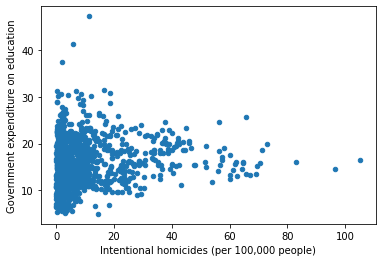

In [59]:
az = data_gh.plot.scatter('Intentional homicides (per 100,000 people)', 'Government expenditure on education, total (% of government expenditure)')
az.set_ylabel("Government expenditure on education")
az.set_xlabel("Intentional homicides (per 100,000 people)")